In [1]:
#Make sure you are using the cmpi6-2019.10 kernel 

#Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys
sys.path.insert(0,'/glade/u/home/abaker/repos/ldcpy')
import ldcpy

#Display output of plots directly in Notebook
%matplotlib inline
#Automatically reload module if it is editted
%reload_ext autoreload
%autoreload 2

#silence warnings
import warnings
warnings.filterwarnings("ignore")

#if you want to use the DASK daskboard on Casper, then modify the below and run
#import dask
#dask.config.set({'distributed.dashboard.link' : 'https://jupyterhub.ucar.edu/dav/user/abaker/proxy/{port}/status'})

#if you want to use the DASK daskboard on Cheyenne, then modify the below and run
import dask
dask.config.set({'distributed.dashboard.link' : 'https://jupyterhub.ucar.edu/ch/user/abaker/proxy/{port}/status'})


### Connect to DASK distributed cluster (Cheyenne uses PBS / Casper uses slurm):

(The cluster object is for a single compute node:
https://jobqueue.dask.org/en/latest/howitworks.html)


In [2]:
# start the dask scheduler

# for Casper
# from dask_jobqueue import SLURMCluster
# cluster = SLURMCluster(memory="40GB", cores=4, processes=1, walltime="02:00:00", project="NIOW0001")

# for Cheyenne
from dask_jobqueue import PBSCluster

cluster = PBSCluster(
    queue="regular",
    walltime="03:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=9:mem=109GB",
    cores=36,
    processes=9,
)


# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster

The scheduler creates a normal-looking job script that it can submit multiple
times to the queue:


In [3]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

<Client: 'tcp://10.148.10.15:45301' processes=0 threads=0, memory=0 B>

In [4]:
col_TS = ldcpy.open_datasets("cam-fv", ["TS"], 
                             ["/glade/p/cisl/asap/abaker/t10_monthly_comp/orig/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                            "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_18/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                            "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_unbiased/zfp_p_18.0/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                            "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_14/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                            "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_unbiased/zfp_p_14.0/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                             "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_20/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                            "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_unbiased/zfp_p_20.0/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                          "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_22/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                            "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_unbiased/zfp_p_22.0/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-208012.nc",
                          
                             ],
                             ["orig", "zfp_p18", "uzfp_p18", "zfp_p14", "uzfp_p14", "zfp_p20", "uzfp_p20", "zfp_p22", "uzfp_p22"]
                            )
                          


dataset size in GB 0.02



In [22]:
col_TS

<xarray.Dataset>
Dimensions:     (collection: 9, lat: 192, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2006-11-01 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U8 'orig' 'zfp_p18' ... 'zfp_p22' 'uzfp_p22'
Data variables:
    TS          (collection, time, lat, lon) float32 dask.array<chunksize=(1, 10, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Feb 25 15:37:22 2021: ncks -d time,0,9,1 b.e11.BRCP...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv

In [23]:
ts0 = col_TS.isel(time=0)
ldcpy.compare_stats(ts0, "TS", ["orig", "zfp_p18", "uzfp_p18" ])

orig zfp_p18 uzfp_p18
mean                  275.66  275.66   275.66
variance              512.85  512.86   512.85
standard deviation    22.646  22.647   22.646
min value             224.49   224.5    224.5
max value             307.26  307.25   307.26
probability positive       1       1        1
number of zeros            0       0        0

zfp_p18    uzfp_p18
max abs diff                          0.018158    0.013824
min abs diff                                 0           0
mean abs diff                        0.0037198   0.0032211
mean squared diff                   1.3037e-06   5.267e-11
root mean squared diff               0.0047361   0.0040786
normalized root mean squared diff   5.7223e-05  4.9279e-05
normalized max pointwise error      0.00017773  0.00016703
pearson correlation coefficient              1           1
ks p-value                                   1           1
spatial relative error(% > 0.0001)           0           0
max spatial relative error          5.6822e-05  5.1452e-05
Data SSIM                              0.99808     0.99845

In [24]:
ts0 = col_TS.isel(time=0)
ldcpy.compare_stats(ts0, "TS", ["orig", "zfp_p20", "uzfp_p20" ])

orig zfp_p20 uzfp_p20
mean                  275.66  275.66   275.66
variance              512.85  512.86   512.85
standard deviation    22.646  22.647   22.646
min value             224.49  224.49   224.49
max value             307.26  307.26   307.26
probability positive       1       1        1
number of zeros            0       0        0

zfp_p20    uzfp_p20
max abs diff                         0.0046082   0.0033875
min abs diff                                 0           0
mean abs diff                       0.00093433  0.00080846
mean squared diff                    8.237e-08  1.9591e-13
root mean squared diff               0.0011904    0.001023
normalized root mean squared diff   1.4383e-05  1.2361e-05
normalized max pointwise error      4.4984e-05  4.0928e-05
pearson correlation coefficient              1           1
ks p-value                                   1           1
spatial relative error(% > 0.0001)           0           0
max spatial relative error          1.3634e-05  1.1724e-05
Data SSIM                              0.99962     0.99957

In [25]:
ts0 = col_TS.isel(time=0)
ldcpy.compare_stats(ts0, "TS", ["orig", "zfp_p22", "uzfp_p22" ])

orig zfp_p22 uzfp_p22
mean                  275.66  275.66   275.66
variance              512.85  512.85   512.85
standard deviation    22.646  22.646   22.646
min value             224.49  224.49   224.49
max value             307.26  307.26   307.26
probability positive       1       1        1
number of zeros            0       0        0

zfp_p22    uzfp_p22
max abs diff                         0.0011292  0.00085449
min abs diff                                 0           0
mean abs diff                       0.00023432  0.00020309
mean squared diff                   5.0779e-09  9.7646e-12
root mean squared diff              0.00029847  0.00025719
normalized root mean squared diff   3.6062e-06  3.1075e-06
normalized max pointwise error       1.143e-05  1.0324e-05
pearson correlation coefficient              1           1
ks p-value                                   1           1
spatial relative error(% > 0.0001)           0           0
max spatial relative error          3.6716e-06  3.3245e-06
Data SSIM                              0.99987     0.99991

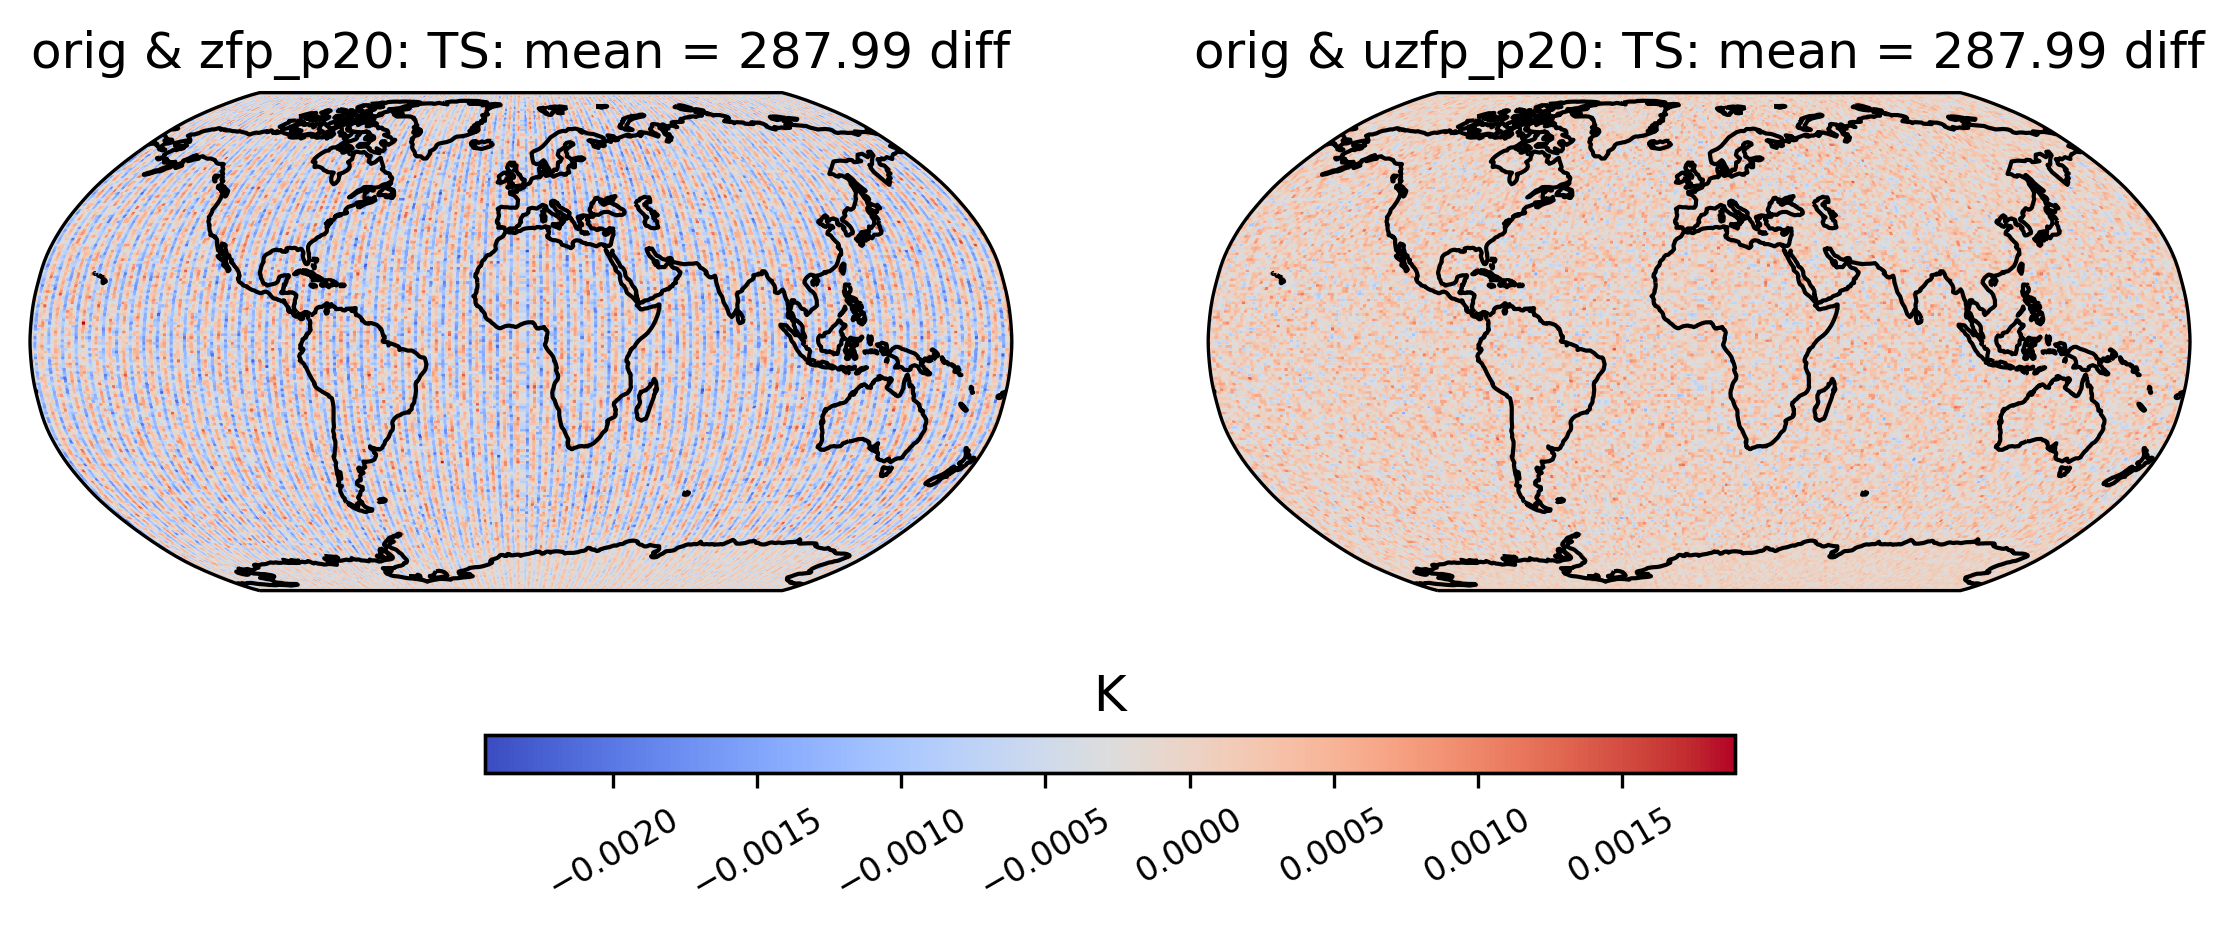

In [26]:
# diff between mean values across the entire timeseries
ldcpy.plot(
    col_TS,
    "TS",
    sets=["orig", "zfp_p20", "uzfp_p20"],
    calc="mean",
    calc_type="diff",
)

In [28]:
col_TS_daily = ldcpy.open_datasets("cam-fv", ["TS"], 
                             [ "/glade/scratch/abaker/zfp_unbiased/daily/orig/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.TS.20060101-20801231.nc",
                              "/glade/scratch/abaker/zfp_unbiased/daily/ts_a0.1.nc", 
                              "/glade/scratch/abaker/zfp_unbiased/daily/zfp_a_0.1/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.TS.20060101-20801231.nc"],
                                ["orig", "zfp_a.1", "uzfp_a.1"]
                               )
col_TS_daily

dataset size in GB 0.01



<xarray.Dataset>
Dimensions:     (collection: 3, lat: 192, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2006-01-10 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U8 'orig' 'zfp_a.1' 'uzfp_a.1'
Data variables:
    TS          (collection, time, lat, lon) float32 dask.array<chunksize=(1, 10, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Fri Dec  4 15:30:36 2020: ncks -L 5 t10.b.e11.BRCP85C5C...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv

In [29]:
d0 = col_TS_daily.isel(time=0)
ldcpy.compare_stats(d0, "TS", ["orig", "zfp_a.1", "uzfp_a.1" ], significant_digits = 7)

orig   zfp_a.1  uzfp_a.1
mean                  275.1304   275.129  275.1304
variance              510.3394  510.2532  510.3487
standard deviation     22.5909  22.58899   22.5911
min value             218.1193  218.1094  218.1172
max value             321.4709  321.4648  321.4688
probability positive         1         1         1
number of zeros              0         0         0

zfp_a.1      uzfp_a.1
max abs diff                          0.03718567     0.0559082
min abs diff                                   0             0
mean abs diff                        0.008407132    0.01424577
mean squared diff                   1.905345e-06  4.030238e-10
root mean squared diff                0.01040778    0.01757968
normalized root mean squared diff   0.0001007027   0.000170096
normalized max pointwise error      0.0003442957  0.0005294359
pearson correlation coefficient        0.9999999     0.9999997
ks p-value                                     1             1
spatial relative error(% > 0.0001)     0.6257234      12.58681
max spatial relative error          0.0001309193  0.0002250027
Data SSIM                              0.9955798      0.993659

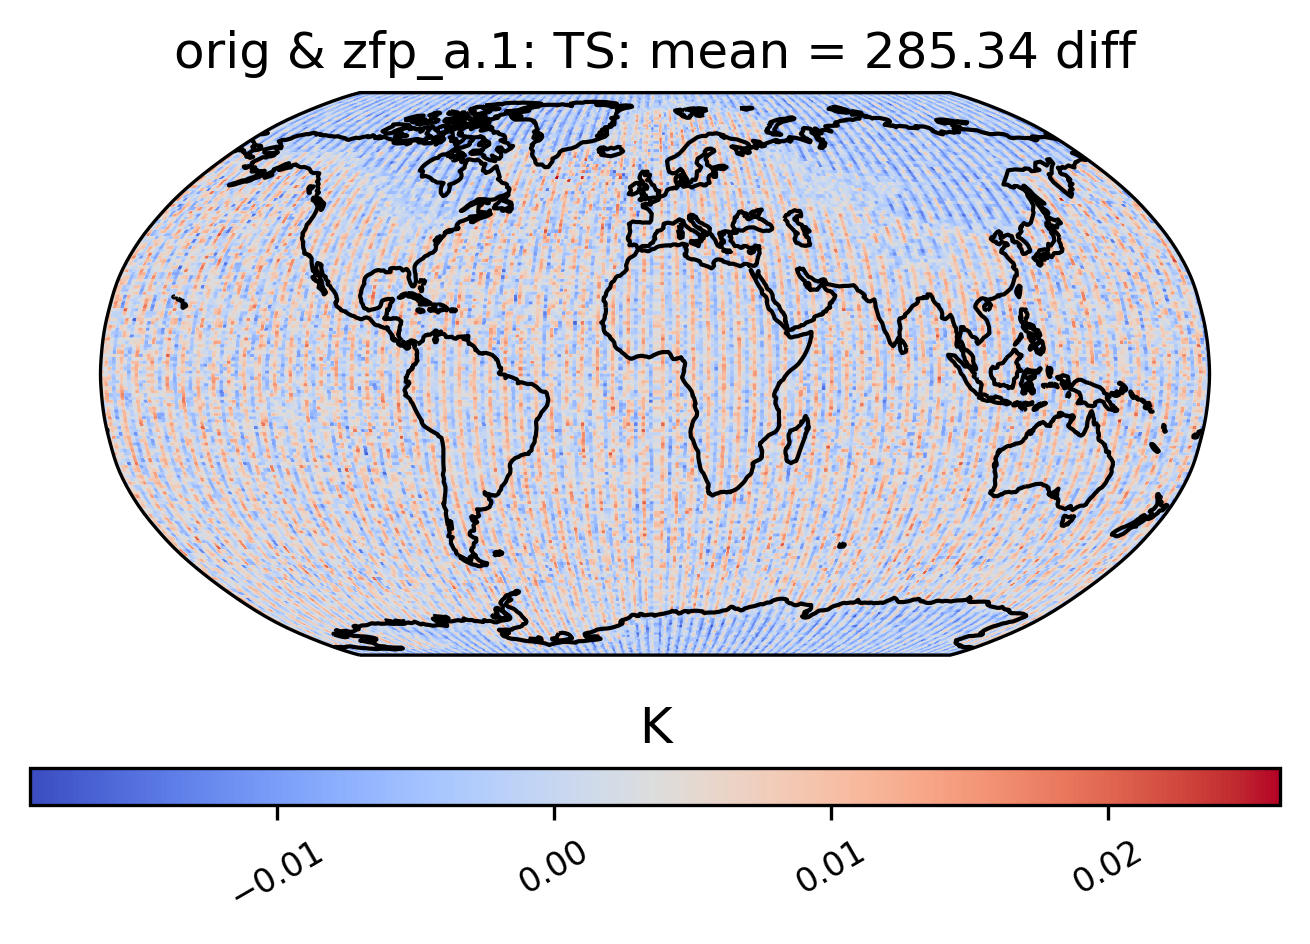

In [30]:
# diff between mean values across the entire timeseries
ldcpy.plot(
    col_TS_daily,
    "TS",
    sets=["orig", "zfp_a.1"],
    calc="mean",
    calc_type="diff",
)

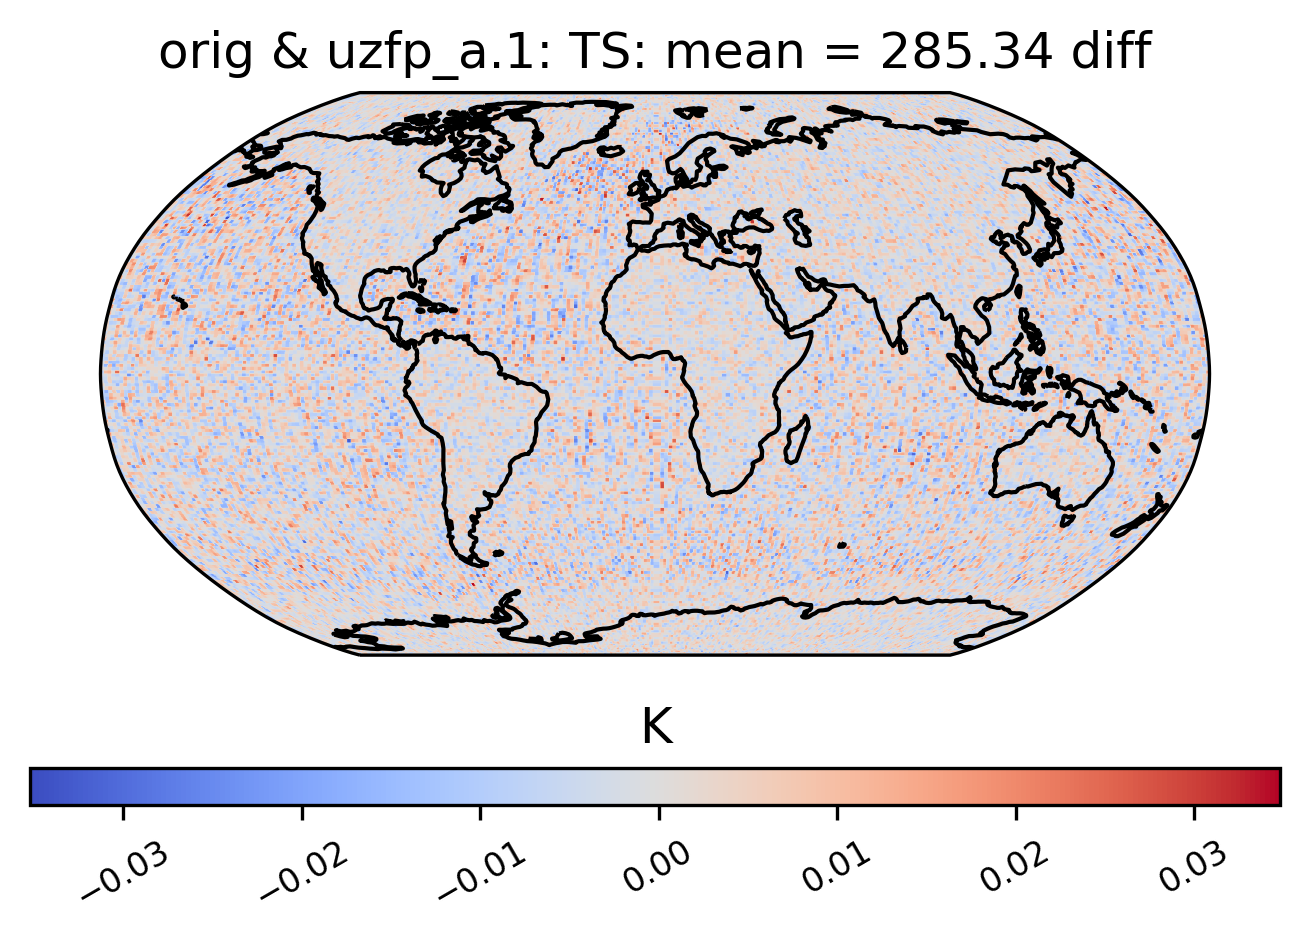

In [31]:
# diff between mean PRECT values across the entire timeseries
ldcpy.plot(
    col_TS_daily,
    "TS",
    sets=["orig", "uzfp_a.1"],
    calc="mean",
    calc_type="diff",
)

In [5]:
col_ABSORB = ldcpy.open_datasets("cam-fv",["ABSORB"], 
                             [ "/glade/scratch/abaker/absorb/ABSORB.orig.200601-208012.nc",
                              "/glade/scratch/abaker/absorb/ABSORB.zfp-p16.200601-208012.nc", 
                              "/glade/scratch/abaker/absorb/zfp_p_16.0/ABSORB.orig.200601-208012.nc",
                              "/glade/scratch/abaker/absorb/zfp_a_0.1/ABSORB.orig.200601-208012.nc"],
                                ["orig", "zfp_p16", "uzfp_p16", "uzfp_a.1"]
                               )
col_ABSORB

dataset size in GB 0.27



<xarray.Dataset>
Dimensions:     (collection: 4, lat: 192, lev: 30, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2006-11-01 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U8 'orig' 'zfp_p16' 'uzfp_p16' 'uzfp_a.1'
Data variables:
    ABSORB      (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Feb 25 15:34:15 2021: ncks -d time,0,9,1 b.e11.BRCP...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv

In [5]:
col_ABSORB_new = ldcpy.open_datasets("cam-fv",["ABSORB"], 
                             [ "/glade/scratch/abaker/new_absorb/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                       "/glade/scratch/abaker/new_absorb/zfp_p_12/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                              "/glade/scratch/abaker/new_absorb/zfp_p_14/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                "/glade/scratch/abaker/new_absorb/zfp_p_16/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                "/glade/scratch/abaker/new_absorb/zfp_p_18/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                 "/glade/scratch/abaker/new_absorb/zfp_p_20/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                   "/glade/scratch/abaker/new_absorb/zfp_a_1e-14/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                              "/glade/scratch/abaker/new_absorb/zfp_a_1e-12/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                 "/glade/scratch/abaker/new_absorb/zfp_a_1e-13/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                 "/glade/scratch/abaker/new_absorb/zfp_a_1e-9/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                 "/glade/scratch/abaker/new_absorb/zfp_a_1e-10/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                              "/glade/scratch/abaker/new_absorb/zfp_a_1e-11/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                          "/glade/scratch/abaker/new_absorb_fill/zfp_p_12/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                              "/glade/scratch/abaker/new_absorb_fill/zfp_p_14/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                "/glade/scratch/abaker/new_absorb_fill/zfp_p_16/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                "/glade/scratch/abaker/new_absorb_fill/zfp_p_18/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc",
                                 "/glade/scratch/abaker/new_absorb_fill/zfp_p_20/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ABSORB.200601-208012.nc"],
                               
                                     
                                     
                                     ["orig", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", 
                                      "zfp_1e-14","zfp_1e-12", "zfp_1e-13", "zfp_1e-9", "zfp_1e-10", "zfp_1e-11",
                                     "fill_p12", "fill_p14", "fill_p16", "fill_p18", "fill_p20", ]
                               )
col_ABSORB_new

dataset size in GB 1.14



<xarray.Dataset>
Dimensions:     (collection: 17, lat: 192, lev: 30, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2006-11-01 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U9 'orig' 'zfp_p12' ... 'fill_p18' 'fill_p20'
Data variables:
    ABSORB      (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Feb 25 15:34:15 2021: ncks -d time,0,9,1 b.e11.BRCP...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv

In [10]:
ab9 = col_ABSORB_new.isel(time=9)
ldcpy.compare_stats(ab9, "ABSORB", ["orig", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18"], significant_digits = 7)

orig        zfp_p12        zfp_p14  \
mean                  3.879436e-07  -3.595707e+28   1.498211e+27   
variance              6.663642e-12   2.722576e+61   1.093942e+60   
standard deviation    2.581404e-06   5.217832e+30   1.045917e+30   
min value             3.115839e-14  -9.735557e+32  -1.622593e+32   
max value             0.0005761429   0.0005764961   1.622593e+32   
probability positive             1      0.9999446      0.9999815   
number of zeros                  0              0              0   

                            zfp_p16       zfp_p18  
mean                   1.123658e+27  2.809146e+26  
variance               8.356391e+58   4.27314e+57  
standard deviation     2.890743e+29  6.536928e+28  
min value             -2.028241e+31             0  
max value              6.084723e+31  1.521181e+31  
probability positive      0.9999815     0.9999631  
number of zeros                   0            60

zfp_p12       zfp_p14        zfp_p16  \
max abs diff                        9.735557e+32  1.622593e+32   6.084723e+31   
min abs diff                                   0             0              0   
mean abs diff                       3.595707e+28  7.491056e+27   1.872764e+27   
mean squared diff                   1.292911e+57  2.244637e+54   1.262608e+54   
root mean squared diff              5.217955e+30  1.045918e+30   2.890764e+29   
normalized root mean squared diff   9.056703e+33  1.815379e+33   5.017443e+32   
normalized max pointwise error      1.689782e+36  2.816303e+35   3.520379e+34   
pearson correlation coefficient     0.0009981735  -0.000207443  -0.0005631626   
ks p-value                             0.9988254             1              1   
spatial relative error(% > 0.0001)      90.86413      65.13262       7.959841   
max spatial relative error          2.741449e+45  4.566216e+44   5.679435e+43   
Data SSIM                              0.9986569     0.9986608      0.9986602   

                                          zfp_p18  
max abs diff                         1.521181e+31  
min abs diff                                    0  
mean abs diff                        2.809146e+26  
mean squared diff                    7.891302e+52  
root mean squared diff               6.536986e+28  
normalized root mean squared diff    1.134612e+32  
normalized max pointwise error       0.0001184443  
pearson correlation coefficient     -0.0006223223  
ks p-value                                      1  
spatial relative error(% > 0.0001)     0.05693955  
max spatial relative error                      1  
Data SSIM                               0.9991309

In [9]:
ab9 = col_ABSORB_new.isel(time=9)

ldcpy.compare_stats(ab9, "ABSORB", ["orig", 'zfp_1e-10', 'zfp_1e-11', 'zfp_1e-12', 'zfp_1e-13', 'zfp_1e-14'], significant_digits = 7)

orig     zfp_1e-10     zfp_1e-11     zfp_1e-12  \
mean                  3.879436e-07  3.879426e-07  3.879428e-07  3.879428e-07   
variance              6.663642e-12  6.663642e-12  6.663642e-12  6.663642e-12   
standard deviation    2.581404e-06  2.581404e-06  2.581404e-06  2.581404e-06   
min value             3.115839e-14             0             0             0   
max value             0.0005761429  0.0005761429  0.0005761429  0.0005761429   
probability positive             1     0.9560993     0.9925948     0.9997181   
number of zeros                  0         71318         12030           458   

                         zfp_1e-13     zfp_1e-14  
mean                  3.879428e-07  3.879428e-07  
variance              6.663642e-12  6.663642e-12  
standard deviation    2.581404e-06  2.581404e-06  
min value                        0             0  
max value             0.0005761429  0.0005761429  
probability positive     0.9999446     0.9999446  
number of zeros                 90            90

zfp_1e-10     zfp_1e-11     zfp_1e-12  \
max abs diff                        6.824085e-08  6.824085e-08  6.824085e-08   
min abs diff                                   0             0             0   
mean abs diff                       1.295048e-11  2.384291e-12  9.826236e-13   
mean squared diff                   1.028228e-24  6.243662e-25  6.043991e-25   
root mean squared diff              1.627152e-10  1.620112e-10  1.619991e-10   
normalized root mean squared diff   2.824216e-07  2.811997e-07  2.811787e-07   
normalized max pointwise error      0.0001184443  0.0001184443  0.0001184443   
pearson correlation coefficient                1             1             1   
ks p-value                                     0  1.218942e-83  4.902994e-06   
spatial relative error(% > 0.0001)      77.52267      47.51214      22.59527   
max spatial relative error                     1             1             1   
Data SSIM                             0.01198776     0.2019944     0.7582618   

                                       zfp_1e-13     zfp_1e-14  
max abs diff                        6.824085e-08  6.824085e-08  
min abs diff                                   0             0  
mean abs diff                       7.897214e-13  7.787811e-13  
mean squared diff                   6.045509e-25  6.044958e-25  
root mean squared diff              1.619989e-10  1.619989e-10  
normalized root mean squared diff   2.811783e-07  2.811783e-07  
normalized max pointwise error      0.0001184443  0.0001184443  
pearson correlation coefficient                1             1  
ks p-value                             0.6741554             1  
spatial relative error(% > 0.0001)      8.521542      3.866103  
max spatial relative error                     1             1  
Data SSIM                              0.9694531     0.9936125

In [8]:
ab9 = col_ABSORB_new.isel(time=9)
ldcpy.compare_stats(ab9, "ABSORB", ["orig", "fill_p12", "fill_p14", "fill_p16", "fill_p18", "fill_p20"], significant_digits = 7)

orig      fill_p12      fill_p14      fill_p16  \
mean                  3.879436e-07  3.879484e-07  3.879438e-07  3.879435e-07   
variance              6.663642e-12  6.665313e-12  6.663542e-12  6.663599e-12   
standard deviation    2.581404e-06  2.581728e-06  2.581385e-06  2.581396e-06   
min value             3.115839e-14    3.1114e-14   3.11591e-14  3.115737e-14   
max value             0.0005761429  0.0005764961  0.0005760789  0.0005761385   
probability positive             1             1             1             1   
number of zeros                  0             0             0             0   

                          fill_p18      fill_p20  
mean                  3.879436e-07  3.879436e-07  
variance               6.66366e-12   6.66364e-12  
standard deviation    2.581407e-06  2.581403e-06  
min value             3.115824e-14  3.115856e-14  
max value             0.0005761534  0.0005761432  
probability positive             1             1  
number of zeros                  0             0

fill_p12      fill_p14      fill_p16  \
max abs diff                        1.141423e-06  2.674933e-07  5.363836e-08   
min abs diff                                   0             0             0   
mean abs diff                       3.271949e-10  8.146936e-11  2.034655e-11   
mean squared diff                   2.291928e-23  3.648103e-26  1.211717e-26   
root mean squared diff               2.98096e-09  7.528083e-10  1.808184e-10   
normalized root mean squared diff   5.173995e-06  1.306635e-06   3.13843e-07   
normalized max pointwise error      0.0005886508  0.0004642829   7.63281e-05   
pearson correlation coefficient        0.9999993             1             1   
ks p-value                             0.9998113             1             1   
spatial relative error(% > 0.0001)      90.86382      65.13071       7.95467   
max spatial relative error             0.1401008    0.03773184   0.007021152   
Data SSIM                              0.9849747      0.995862     0.9989101   

                                        fill_p18      fill_p20  
max abs diff                        1.915032e-08  4.540198e-09  
min abs diff                                   0             0  
mean abs diff                       5.109047e-12  1.282776e-12  
mean squared diff                   4.692805e-28   4.53102e-29  
root mean squared diff              4.713043e-11  1.223115e-11  
normalized root mean squared diff   8.180338e-08  2.122937e-08  
normalized max pointwise error      1.641736e-05  7.122609e-06  
pearson correlation coefficient                1             1  
ks p-value                                     1             1  
spatial relative error(% > 0.0001)    0.05139948   0.001292682  
max spatial relative error           0.001902704  0.0002383499  
Data SSIM                              0.9996818     0.9997717

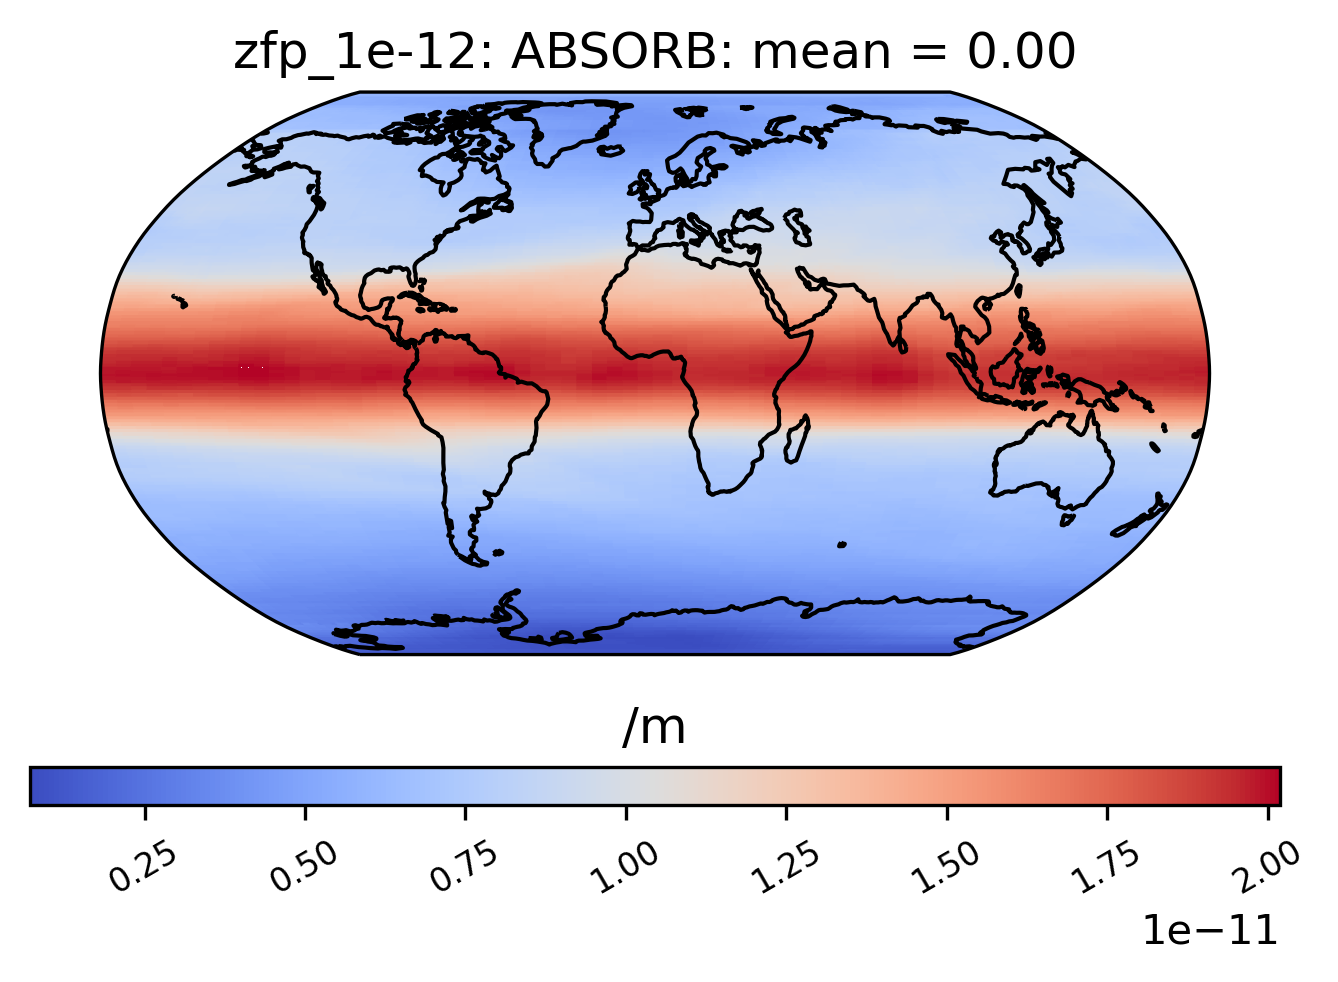

In [8]:
ldcpy.plot(
    col_ABSORB_new,
    "ABSORB",
    sets=["zfp_1e-12"],
    calc="mean"
)

In [9]:
AB_o = col_ABSORB_new["ABSORB"].sel(collection="orig").isel(time=9).compute().data
AB_p12 = col_ABSORB_new["ABSORB"].sel(collection="zfp_p12").isel(time=9).compute().data
AB_p12_fill = col_ABSORB_new["ABSORB"].sel(collection="fill_p12").isel(time=9).compute().data
AB_e10 = col_ABSORB_new["ABSORB"].sel(collection="zfp_1e-10").isel(time=9).compute().data


In [20]:
import numpy as np
g = np.where(abs(AB_p12) > 1e10)
g

(array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
         5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
        11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
        17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
        22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
        28, 28, 29, 29, 29]),
 array([188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188,
        188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188,
        188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188,
        188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188,
        188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188,
        188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188,
        188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188]),
 array([135, 140, 141, 135, 140, 141, 135, 140, 141, 135, 140, 141, 135,
        1

In [21]:
AB_p12[1,188,135]

-6.490371e+32

In [22]:
AB_p12_fill[1,188,135]

8.135714e-12

In [24]:
AB_o[1,188,135]

8.129182e-12

In [25]:
AB_e10[1,188,135]

0.0

In [27]:
import numpy as np
np.nanmax(AB_o)

0.00033572342

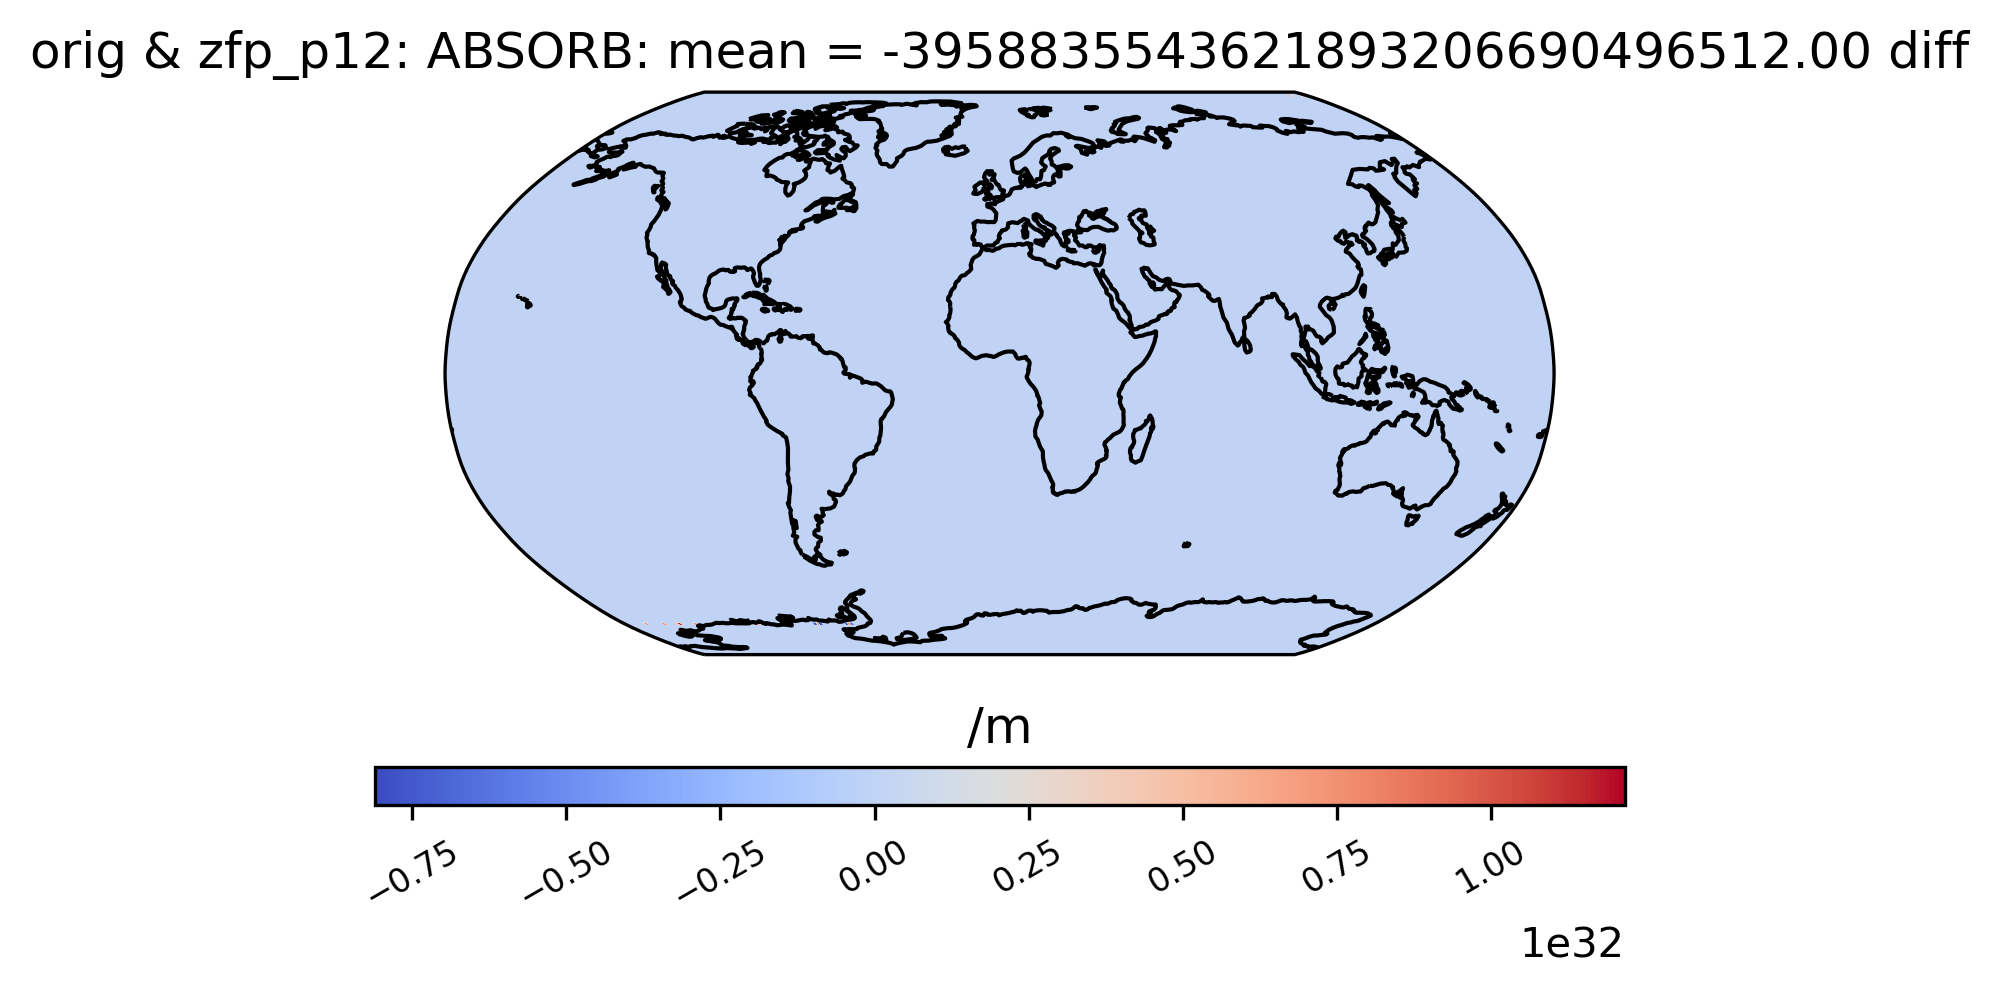

In [15]:
ldcpy.plot(
    col_ABSORB_new,
    "ABSORB",
    sets=["orig", "zfp_p12"],
    calc="mean",
    calc_type="diff",
)

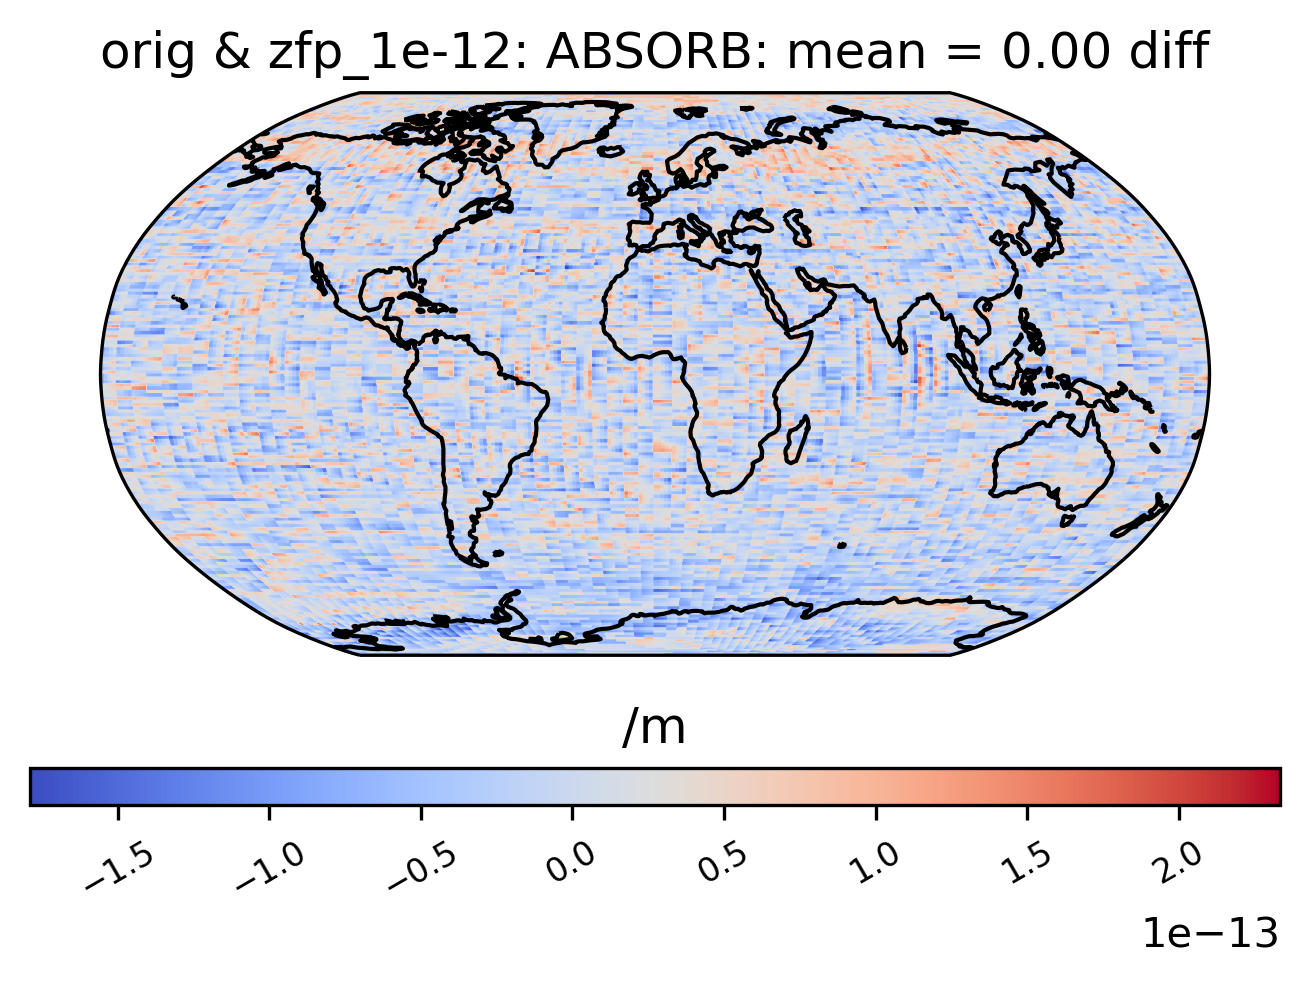

In [29]:
ldcpy.plot(
    col_ABSORB_new,
    "ABSORB",
    sets=["orig", "zfp_1e-12"],
    calc="mean",
    calc_type="diff",
)

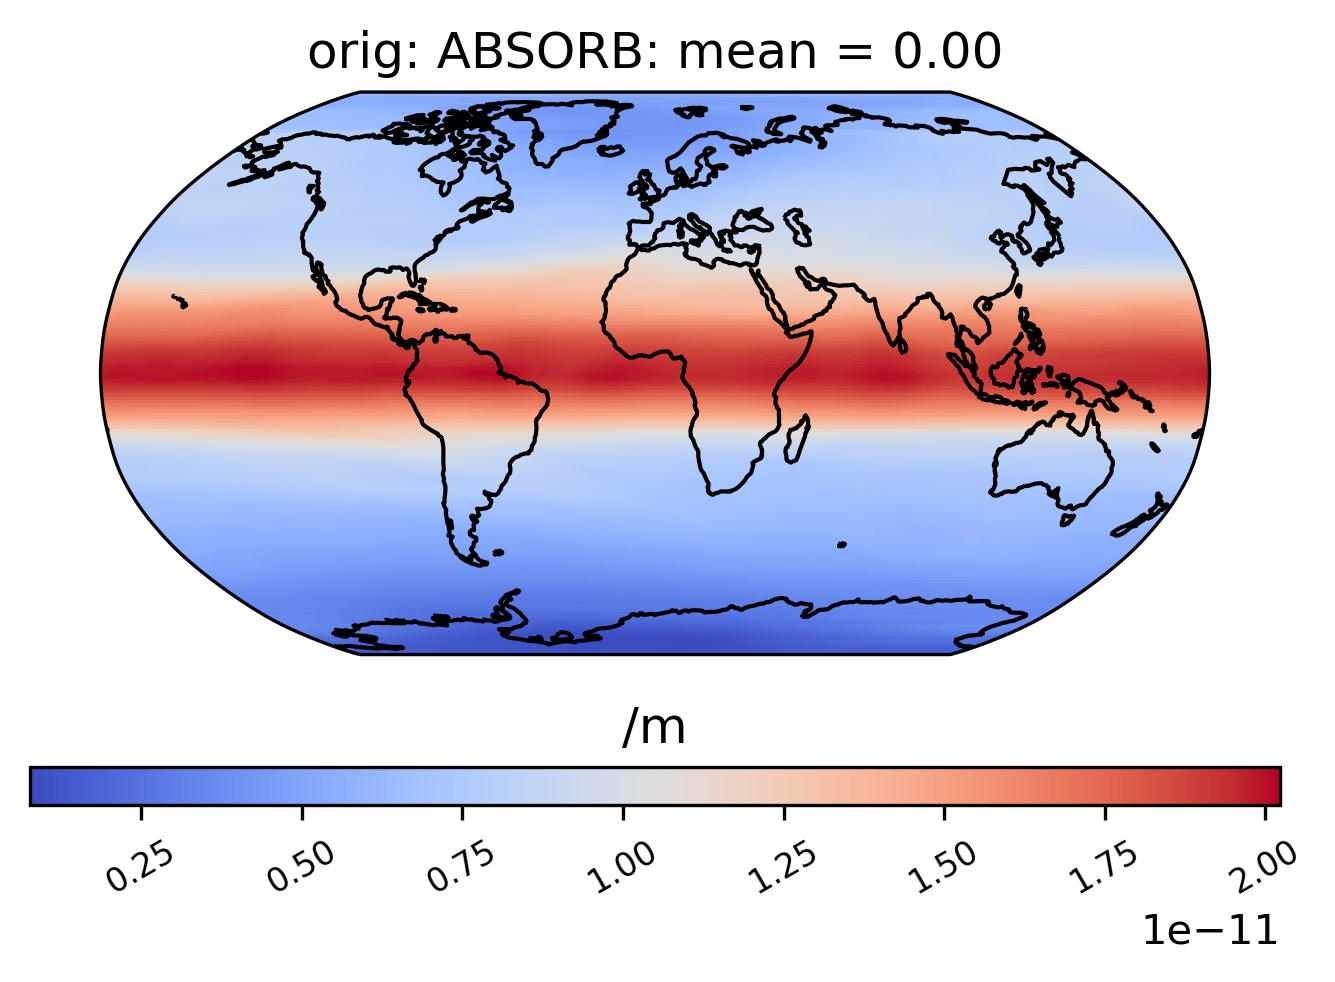

In [35]:
ldcpy.plot(
    col_ABSORB_new,
    "ABSORB",
    sets=["orig"],
    calc="mean"
)

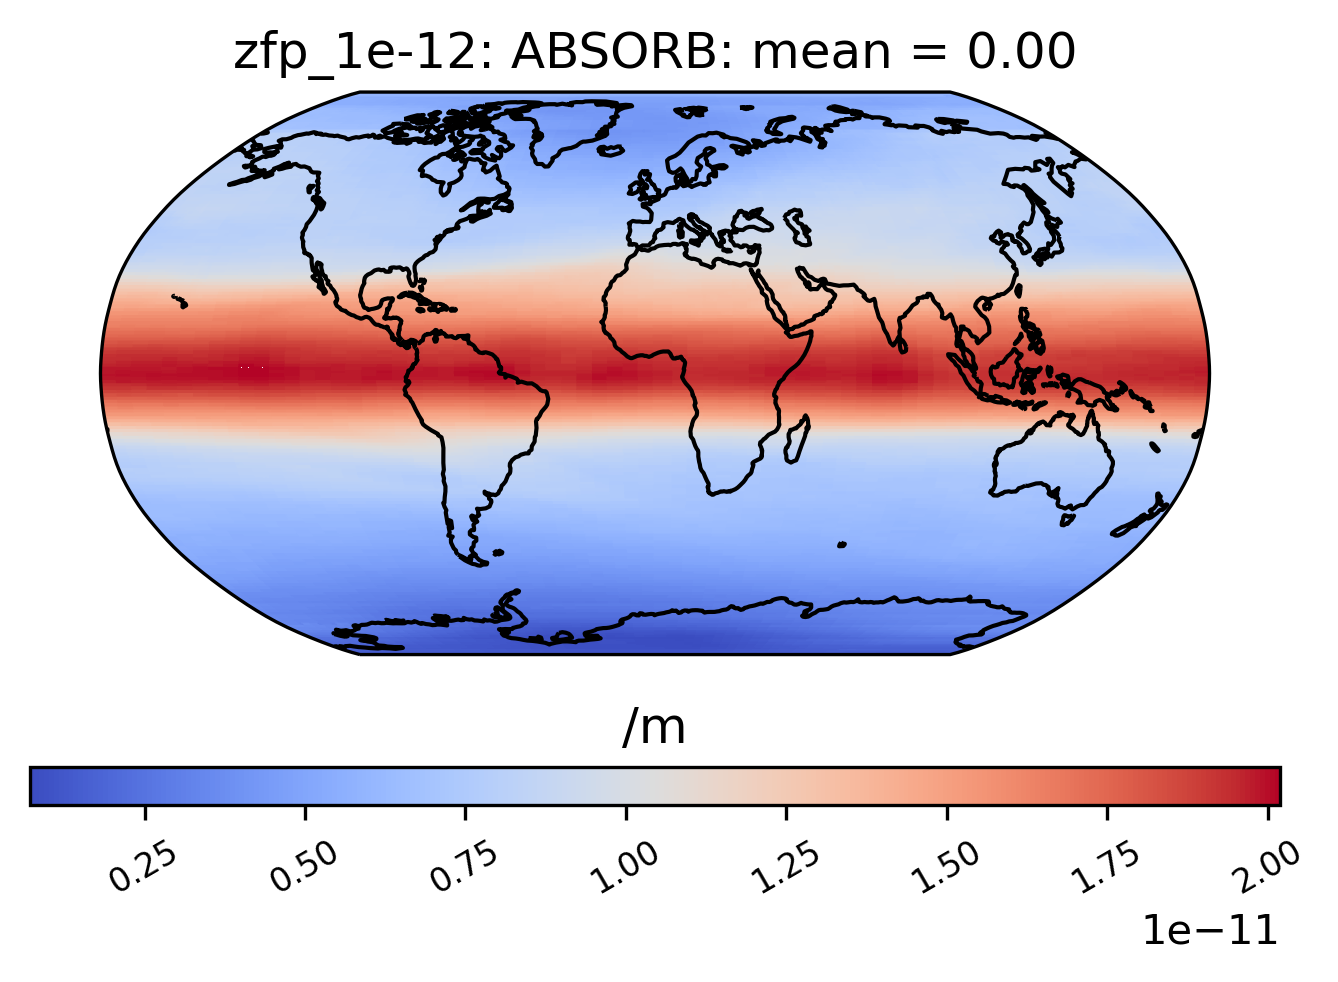

In [37]:
ldcpy.plot(
    col_ABSORB_new,
    "ABSORB",
    sets=["zfp_1e-12"],
    calc="mean"
)

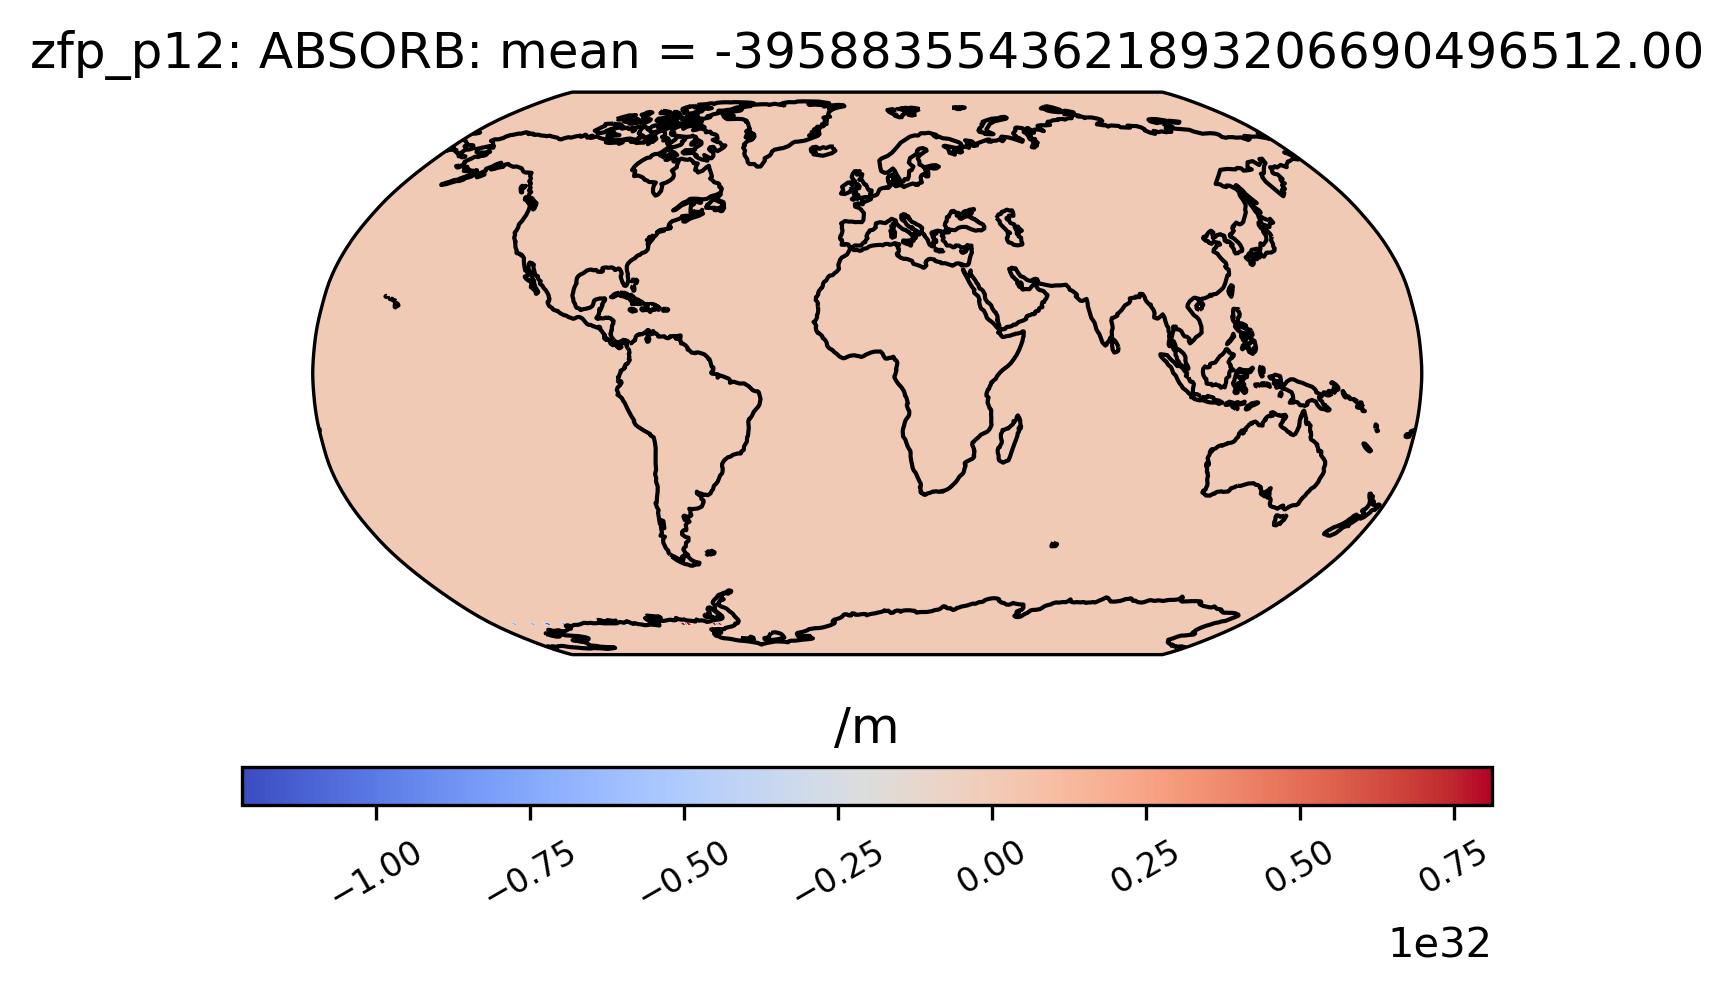

In [38]:
ldcpy.plot(
    col_ABSORB_new,
    "ABSORB",
    sets=["zfp_p12"],
    calc="mean"
)

In [10]:
ab0_orig.data

array([[[2.38171635e-12, 2.38171635e-12, 2.38171635e-12, ...,
         2.38171635e-12, 2.38171635e-12, 2.38171635e-12],
        [2.38080692e-12, 2.37991744e-12, 2.37986735e-12, ...,
         2.38123605e-12, 2.38178336e-12, 2.38059529e-12],
        [2.38189026e-12, 2.38038127e-12, 2.37988210e-12, ...,
         2.38639859e-12, 2.38360894e-12, 2.38294237e-12],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[1.14635055e-11, 1.14635055e-11, 1.14635055e-11, ...,
         1.14635055e-11, 1.14635055e-11, 1.14635055e-11],
        [1.11156319e-11, 1.11108666e-11, 1.11057621e-11, ...,
         1.11272059e-11, 1.11233800e-11, 1.11197206e-11],
        [1.08142549e-11, 

In [9]:
col_T = ldcpy.open_datasets("cam-fv",["T"], 
                             [ "/glade/scratch/abaker/new_absorb/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.T.200601-208012.nc",
                              "/glade/scratch/abaker/new_absorb/zfp_p_16/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.T.200601-208012.nc"], 
                                ["orig", "zfp_p16"]
                              )
col_T

FileNotFoundError: [Errno 2] No such file or directory: b'/glade/scratch/abaker/new_absorb/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.T.200601-208012.nc'

In [42]:
t0 = col_T.isel(time=0)
ldcpy.compare_stats(t0, "T", ["orig", "zfp_p16"], significant_digits = 7)

orig   zfp_p16
mean                  238.8774  238.8808
variance              892.4502  892.5099
standard deviation    29.87391  29.87491
min value             180.6055  180.6016
max value             303.9415  303.9766
probability positive         1         1
number of zeros              0         0

zfp_p16
max abs diff                          0.07543945
min abs diff                                   0
mean abs diff                         0.01007393
mean squared diff                   1.146087e-05
root mean squared diff                0.01349556
normalized root mean squared diff    0.000109421
normalized max pointwise error      0.0005045188
pearson correlation coefficient        0.9999999
ks p-value                             0.9999822
spatial relative error(% > 0.0001)      6.473886
max spatial relative error          0.0002345048
Data SSIM                              0.9764983

In [46]:
# load the last 75 years of FLUT data
col_Z500 = ldcpy.open_datasets(
    ["Z500"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/Z500.daily.20060101-20801231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.Z500.daily.20060101-20801231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_Z500

dataset size in GB 12.11



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lon: 288, time: 27375)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2080-12-31 00:00:00
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    Z500        (collection, time, lat, lon) float32 dask.array<chunksize=(1, 500, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Mon Aug 31 11:30:23 2020: ncks -d time,0,27374,1 b.e11....
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

In [48]:
z500 = col_Z500.isel(time=0)
ldcpy.compare_stats(z500, "Z500", ["orig", "lossy"], significant_digits = 8)

orig      lossy
mean                  5506.0929  5505.0931
variance              95273.009  95273.578
standard deviation    308.66605  308.66697
min value             5909.6133       5908
max value             4880.7241       4880
probability positive          1          1
number of zeros               0          0

lossy
max abs diff                            1.9995117
min abs diff                                    0
mean abs diff                          0.99978998
mean squared diff                         0.99958
root mean squared diff                  1.1529861
normalized root mean squared diff    0.0011206125
normalized max pointwise error       0.0019433694
pearson correlation coefficient        0.99999827
ks p-value                           6.991649e-08
spatial relative error(% > 0.0001)      72.867839
max spatial relative error          0.00040396234
Data SSIM                              0.94749552

 SSIM 1 & 2 =  0.99859



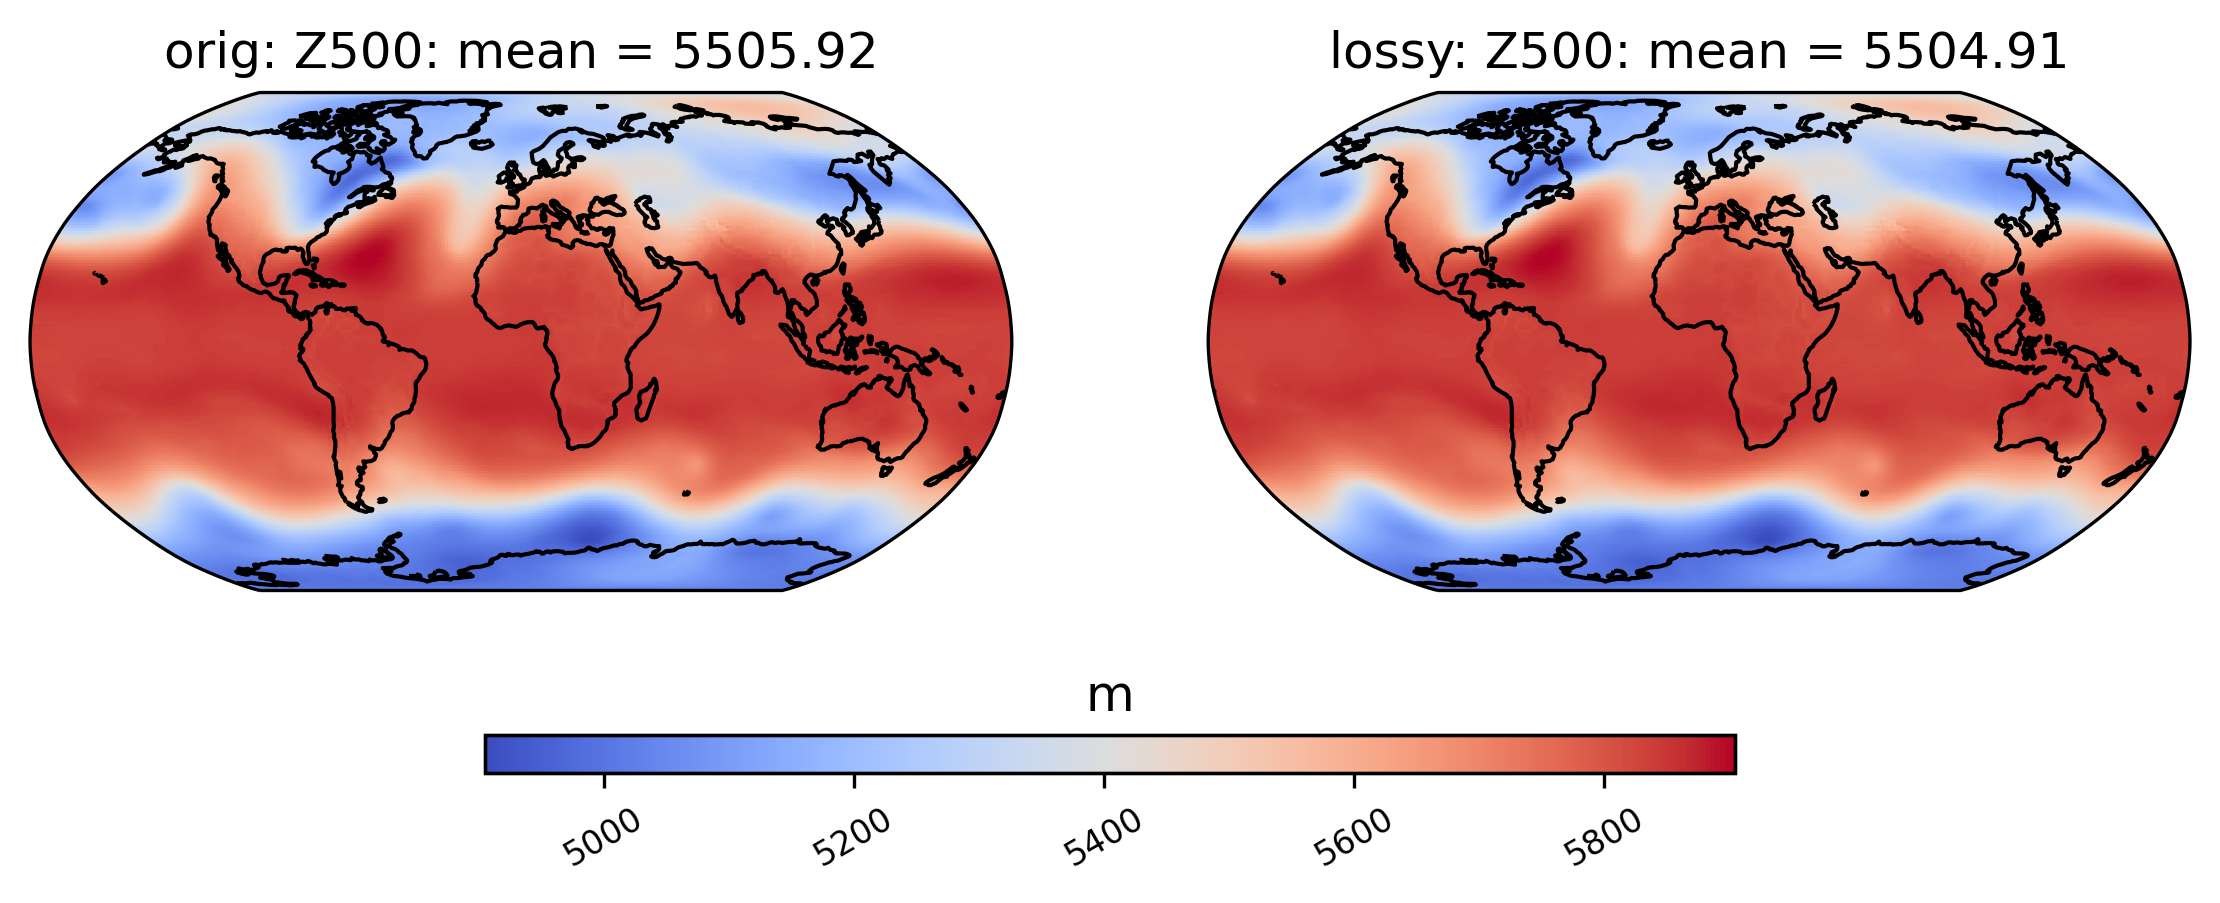

In [49]:
ldcpy.plot(col_Z500, "Z500", sets=["orig", "lossy"], calc="mean", start = 0, end = 1, calc_ssim = True)

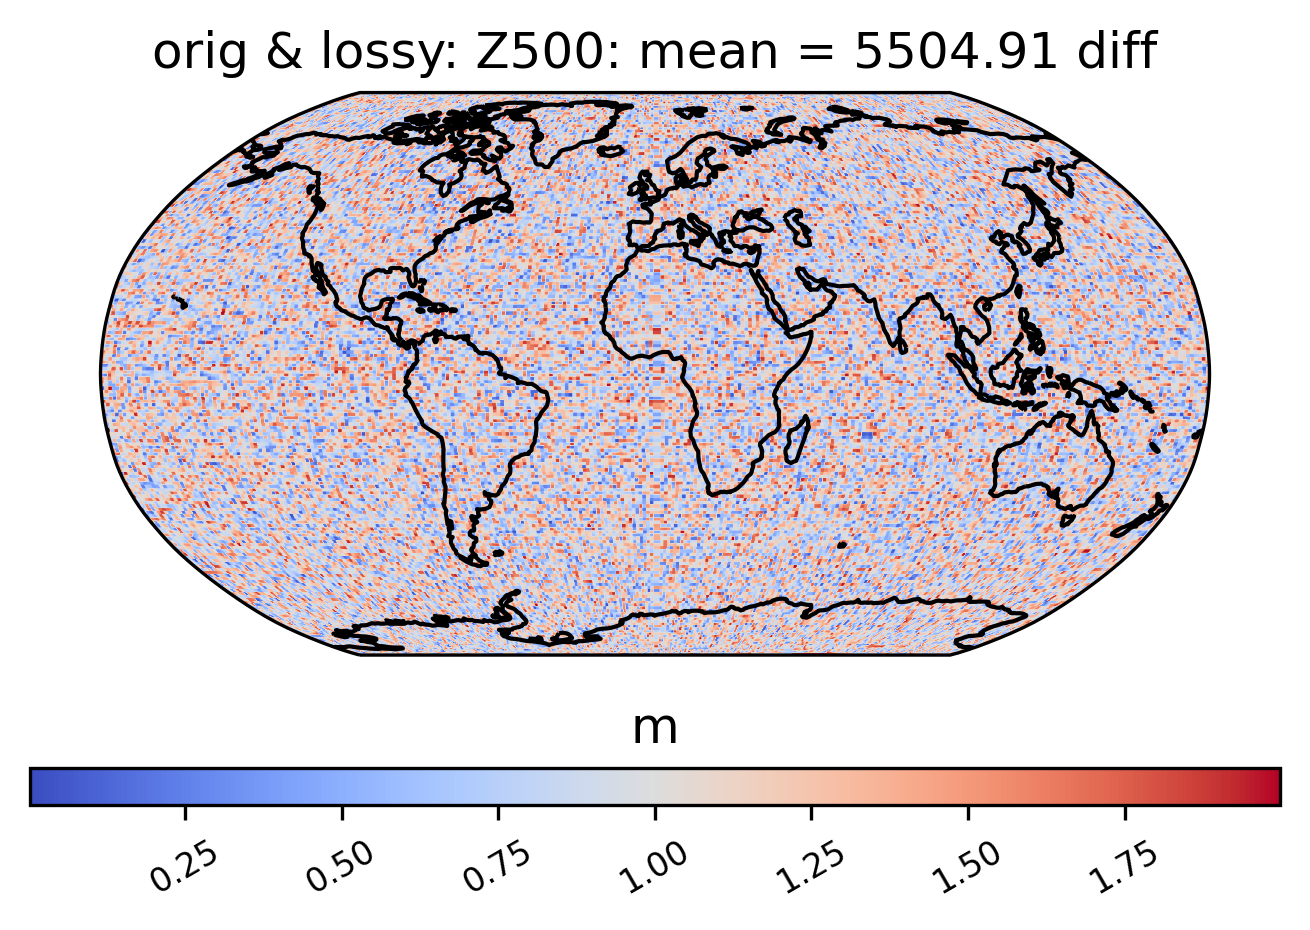

In [50]:
ldcpy.plot(col_Z500, "Z500", sets=["orig", "lossy"], calc="mean", calc_type = "diff", start = 0, end = 1)

In [ ]:
# load the last 75 years of FLUT data
col_LHFLX = ldcpy.open_datasets(
    ["LHFLX"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/LHFLX.daily.20060101-20801231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.LHFLX.daily.20060101-20801231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_LHFLX

In [ ]:
lh0 = col_LHFLX.isel(time=0)
ldcpy.compare_stats(lh0, "LHFLX", "orig", "lossy", significant_digits = 8)

In [ ]:
# load the last 75 years of FLUT data
col_S = ldcpy.open_datasets(
    ["so4_a2_SRF"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/so4_a2_SRF.daily.20060101-20801231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.so4_a2_SRF.daily.20060101-20801231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_S

In [ ]:
s0 = col_S.isel(time=0)
ldcpy.compare_stats(s0, "so4_a2_SRF", "orig", "lossy", significant_digits = 8)

Do any other comparisons you wish ... and then clean up!


In [ ]:
# load the last 75 years of FLUT data
col_TMQ = ldcpy.open_datasets(
    ["TMQ"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/TMQ.monthly.200601-208012.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.TMQ.monthly.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_TMQ

In [ ]:
tmq0 = col_TMQ.isel(time=0)
ldcpy.compare_stats(tmq0, "TMQ", "orig", "lossy", significant_digits = 8)

In [ ]:
# load the last 75 years of FLUT data
col_TREFHT = ldcpy.open_datasets(
    ["TREFHT"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/TREFHT.monthly.200601-208012.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.TREFHT.monthly.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_TREFHT

In [ ]:
tr0 = col_TREFHT.isel(time=0)
ldcpy.compare_stats(tr0, "TREFHT", "orig", "lossy", significant_digits = 8)

In [ ]:
# load the last 75 years of FLUT data
col_CCN3 = ldcpy.open_datasets(
    ["CCN3"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/CCN3.monthly.200601-208012.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.CCN3.monthly.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_CCN3

In [ ]:
ccn0 = col_CCN3.isel(time=0)
ldcpy.compare_stats(ccn0, "CCN3", "orig", "lossy", significant_digits = 8)

In [5]:
col_CLOUD = ldcpy.open_datasets(
    ["CLOUD"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/CLOUD.monthly.200601-208012.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.CLOUD.monthly.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_CLOUD

dataset size in GB 11.94



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lev: 30, lon: 288, time: 900)
Coordinates:
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * time        (time) object 2006-02-01 00:00:00 ... 2081-01-01 00:00:00
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    CLOUD       (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 500, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...

In [6]:
c0 = col_CLOUD.isel(time=0)
ldcpy.compare_stats(c0, "CLOUD", "orig", "lossy", significant_digits = 8)

 
mean orig                          : 0.12512815
mean lossy                         : 0.12477632
mean diff                          : 0.00035182962
 
variance orig                      : 0.024952427
variance lossy                     : 0.024811753
 
standard deviation orig            : 0.15796342
standard deviation lossy           : 0.15751752
 
max value orig                     : 0.98416442
max value lossy                    : 0.98046875
min value orig                     : 0
min value lossy                    : 0
 
max abs diff                       : 0.0039061904
min abs diff                       : 0
mean abs diff                      : 0.00035182962
mean squared diff                  : 1.2378408e-07
root mean squared diff             : 0.00066918173
normalized root mean squared diff  : 0.00067994912
normalized max pointwise error     : 0.0039690425
pearson correlation coefficient    : 0.99999748
ks p-value                         : 4.1297926e-05
spatial relative error(% > 0.0001

In [44]:
colev0 = col_CLOUD["CLOUD"].isel(time=0).isel(lev=0).compute()

In [49]:
colev0.mean()

<xarray.DataArray 'CLOUD' ()>
array(0., dtype=float32)
Coordinates:
    lev      float64 3.643
    time     object 2006-02-01 00:00:00

In [9]:
col_ANRAIN = ldcpy.open_datasets(
    ["ANRAIN"],
    [
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/orig/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ANRAIN.200601-208012.nc",
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_18/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.ANRAIN.200601-208012.nc",
    ],
    ["orig", "lossy"]
)
col_ANRAIN

dataset size in GB 0.13



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lev: 30, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2006-11-01 00:00:00
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    ANRAIN      (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Feb 25 15:34:20 2021: ncks -d time,0,9,1 b.e11.BRCP...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...

In [8]:
col_PRECSC = ldcpy.open_datasets(
    ["PRECSC"],
    [
        "/glade/p/cisl/asap/abaker/t10_daily_comp/orig/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECSC.20060101-20801231.nc",
        "/glade/p/cisl/asap/abaker/t10_daily_comp/zfp_p_10/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECSC.20060101-20801231.nc",
    ],
    ["orig", "lossy"]
)
col_PRECSC

dataset size in GB 0.00



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2006-01-10 00:00:00
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    PRECSC      (collection, time, lat, lon) float32 dask.array<chunksize=(1, 10, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Fri Dec  4 15:30:30 2020: ncks -L 5 t10.b.e11.BRCP85C5C...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

In [9]:
pr0 = col_PRECSC.isel(time=0)
ldcpy.compare_stats(pr0, "PRECSC", "orig", "lossy", significant_digits = 8)

 
mean orig                          : 1.9429568e-11
mean lossy                         : 1.9473814e-11
mean diff                          : -4.4245591e-14
 
variance orig                      : 3.6298469e-19
variance lossy                     : 3.6315912e-19
 
standard deviation orig            : 6.0248755e-10
standard deviation lossy           : 6.026323e-10
 
max value orig                     : 6.0717383e-08
max value lossy                    : 6.0419552e-08
min value orig                     : 0
min value lossy                    : -3.4924597e-10
 
max abs diff                       : 6.0958705e-10
min abs diff                       : 0
mean abs diff                      : 1.6711028e-13
mean squared diff                  : 1.9576723e-27
root mean squared diff             : 5.0513821e-12
normalized root mean squared diff  : 8.319499e-05
normalized max pointwise error     : 0.005751993
pearson correlation coefficient    : 0.99996489
ks p-value                         : 0.99998606
sp

In [11]:
a0 = col_ANRAIN.isel(time=0)
ldcpy.compare_stats(a0, "ANRAIN", "orig", "lossy", significant_digits = 8)

 
mean orig                          : 775.00287
mean lossy                         : 775.00672
mean diff                          : -0.0038531875
 
variance orig                      : 9591490.3
variance lossy                     : 9591572.6
 
standard deviation orig            : 3097.0141
standard deviation lossy           : 3097.0273
 
max value orig                     : 92514.953
max value lossy                    : 92513.5
min value orig                     : 0
min value lossy                    : -0.375
 
max abs diff                       : 3.0039062
min abs diff                       : 0
mean abs diff                      : 0.012684218
mean squared diff                  : 1.4847054e-05
root mean squared diff             : 0.059787201
normalized root mean squared diff  : 6.4624365e-07
normalized max pointwise error     : 3.0696051e-05
pearson correlation coefficient    : 1
ks p-value                         : 3.4895715e-16
spatial relative error(% > 0.0001) : 2.4713662
max spat

In [15]:
alev0 = col_ANRAIN["ANRAIN"].isel(time=0).isel(lev=0).compute()
alev0.mean()

<xarray.DataArray 'ANRAIN' ()>
array(0., dtype=float32)
Coordinates:
    lev      float64 3.643
    time     object 2006-02-01 00:00:00

In [ ]:
/glade/p/cisl/asap/abaker/t10_monthly_comp/orig


In [ ]:
col_U = ldcpy.open_datasets(
    ["U"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/U.monthly.200601-208012.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.U.monthly.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_U

In [ ]:
u0 = col_U.isel(time=0)
ldcpy.compare_stats(u0, "U", "orig", "lossy", significant_digits = 8)

In [ ]:
col_Q = ldcpy.open_datasets(
    ["Q"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/Q.monthly.200601-208012.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.Q.monthly.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
    
).persist()
col_Q

In [ ]:
q0 = col_Q.isel(time=0)
ldcpy.compare_stats(q0, "Q", "orig", "lossy", significant_digits = 8)

In [ ]:
col_FLNS = ldcpy.open_datasets(
    ["FLNS"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/FLNS.monthly.200601-208012.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.FLNS.monthly.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
    
).persist()
col_FLNS

In [ ]:
flns0 = col_FLNS.isel(time=0)
ldcpy.compare_stats(flns0, "FLNS", "orig", "lossy", significant_digits = 8)

In [ ]:
col_ABSORB = ldcpy.open_datasets(
    ["ABSORB"],
    [
        "/glade/scratch/abaker/absorb/ABSORB.orig.200601-208012.nc",
        "/glade/scratch/abaker/absorb/ABSORB.zfp-p16.200601-208012.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
    
).persist()
col_ABSORB

In [ ]:
ab_orig = col_ABSORB.ABSORB.isel(time=0).sel(collection='orig')
ab_comp = col_ABSORB.ABSORB.isel(time=0).sel(collection='lossy')


In [ ]:
ao = ab_orig.data.compute()
ac = ab_comp.data.compute()


In [8]:
col_TAUX = ldcpy.open_datasets(
    ["TAUX"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/TAUX.daily.20060101-20801231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.TAUX.daily.20060101-20801231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
    
).persist()
col_TAUX

dataset size in GB 12.11



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lon: 288, time: 27375)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2080-12-31 00:00:00
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    TAUX        (collection, time, lat, lon) float32 dask.array<chunksize=(1, 500, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Fri Oct 30 15:10:51 2020: ncks -d time,0,27374,1 b.e11....
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

In [9]:
taux0 = col_TAUX.isel(time=0)
ldcpy.compare_stats(taux0, "TAUX", "orig", "lossy", significant_digits = 8)

 
mean orig                          : -0.0059424654
mean lossy                         : -0.0059267409
mean diff                          : -1.572451e-05
 
variance orig                      : 0.015091483
variance lossy                     : 0.015006493
 
standard deviation orig            : 0.12284851
standard deviation lossy           : 0.1225021
 
max value orig                     : 1.0131738
max value lossy                    : 1.0078125
min value orig                     : -2.0386066
min value lossy                    : -2.03125
 
max abs diff                       : 0.0076217651
min abs diff                       : 0
mean abs diff                      : 0.0001813352
mean squared diff                  : 2.4726021e-10
root mean squared diff             : 0.00040592454
normalized root mean squared diff  : 0.00013301237
normalized max pointwise error     : 0.0017567838
pearson correlation coefficient    : 0.99999852
ks p-value                         : 1
spatial relative error(% > 

In [10]:
col_SHFLX = ldcpy.open_datasets(
    ["SHFLX"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/SHFLX.daily.20060101-20801231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.SHFLX.daily.20060101-20801231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
    
).persist()
col_SHFLX

dataset size in GB 12.11



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lon: 288, time: 27375)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2080-12-31 00:00:00
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    SHFLX       (collection, time, lat, lon) float32 dask.array<chunksize=(1, 500, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Mon Aug 31 13:38:12 2020: ncks -d time,0,27374,1 b.e11....
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

In [11]:
sh0 = col_SHFLX.isel(time=0)
ldcpy.compare_stats(sh0, "SHFLX", "orig", "lossy", significant_digits = 8)

 
mean orig                          : 7.4644976
mean lossy                         : 7.4644147
mean diff                          : 8.2875092e-05
 
variance orig                      : 1573.1082
variance lossy                     : 1573.0734
 
standard deviation orig            : 39.662787
standard deviation lossy           : 39.662349
 
max value orig                     : 691.3949
max value lossy                    : 691.39062
min value orig                     : -113.90568
min value lossy                    : -113.9043
 
max abs diff                       : 0.014892578
min abs diff                       : 0
mean abs diff                      : 0.00021204489
mean squared diff                  : 6.868281e-09
root mean squared diff             : 0.00052663958
normalized root mean squared diff  : 6.5396647e-07
normalized max pointwise error     : 1.8493192e-05
pearson correlation coefficient    : 1
ks p-value                         : 1
spatial relative error(% > 0.0001) : 0
max spatia

In [13]:
col_FSNTOA = ldcpy.open_datasets(
    ["FSNTOA"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/FSNTOA.daily.20060101-20801231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.FSNTOA.daily.20060101-20801231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
    
).persist()
col_FSNTOA

dataset size in GB 12.11



<xarray.Dataset>
Dimensions:     (collection: 2, lat: 192, lon: 288, time: 27375)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2080-12-31 00:00:00
  * collection  (collection) <U5 'orig' 'lossy'
Data variables:
    FSNTOA      (collection, time, lat, lon) float32 dask.array<chunksize=(1, 500, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Mon Aug 31 16:04:32 2020: ncks -d time,0,27374,1 b.e11....
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

In [14]:
f0 = col_FSNTOA.isel(time=0)
ldcpy.compare_stats(f0, "FSNTOA", "orig", "lossy", significant_digits = 8)

 
mean orig                          : 210.94513
mean lossy                         : 210.34667
mean diff                          : 0.59845862
 
variance orig                      : 104789.38
variance lossy                     : 104186.68
 
standard deviation orig            : 323.71481
standard deviation lossy           : 322.78253
 
max value orig                     : 1313.0177
max value lossy                    : 1312
min value orig                     : 0
min value lossy                    : 0
 
max abs diff                       : 7.9997559
min abs diff                       : 0
mean abs diff                      : 0.59845862
mean squared diff                  : 0.35815272
root mean squared diff             : 1.3106413
normalized root mean squared diff  : 0.0009981901
normalized max pointwise error     : 0.0060926489
pearson correlation coefficient    : 0.99999765
ks p-value                         : 0.91529877
spatial relative error(% > 0.0001) : 49.088542
max spatial relative 

In [5]:
col_CLOUD = ldcpy.open_datasets(
    ["CLOUD"],
    [
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/orig/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-208012.nc",
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_10/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-208012.nc",
 "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_12/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_14/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_16/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_18/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-208012.nc",
  
    
    ],
    ["orig", "p10", "p12", "p14", "p16", "p18"]
)
col_CLOUD

dataset size in GB 0.40



<xarray.Dataset>
Dimensions:     (collection: 6, lat: 192, lev: 30, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2006-11-01 00:00:00
  * collection  (collection) <U4 'orig' 'p10' 'p12' 'p14' 'p16' 'p18'
Data variables:
    CLOUD       (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Feb 25 15:35:03 2021: ncks -d time,0,9,1 b.e11.BRCP...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...

In [7]:
c_orig = col_CLOUD["CLOUD"].sel(collection="orig").isel(time=0).compute()
c_comp = col_CLOUD["CLOUD"].sel(collection="p14").isel(time=0).compute()
mydm = ldcpy.metrics.DiffMetrics(c_orig, c_comp, aggregate_dims=['lat', 'lon'])
c_ssim = mydm.get_diff_metric('ssim')
print(c_ssim)

0.999920327040115


In [8]:
c_orig = col_CLOUD["CLOUD"].sel(collection="orig").isel(time=0).compute()
c_comp = col_CLOUD["CLOUD"].sel(collection="p16").isel(time=0).compute()
mydm = ldcpy.metrics.DiffMetrics(c_orig, c_comp, aggregate_dims=['lat', 'lon'])
c_ssim = mydm.get_diff_metric('ssim')
print(c_ssim)

0.9999807135034996


In [9]:
col_CCN3 = ldcpy.open_datasets(
    ["CCN3"],
    [
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/orig/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-208012.nc",
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_20/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-208012.nc",
 "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_12/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_14/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_16/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_18/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-208012.nc",
  
    
    ],
    ["orig", "p20", "p12", "p14", "p16", "p18"]
)
col_CCN3

dataset size in GB 0.40



<xarray.Dataset>
Dimensions:     (collection: 6, lat: 192, lev: 30, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2006-11-01 00:00:00
  * collection  (collection) <U4 'orig' 'p20' 'p12' 'p14' 'p16' 'p18'
Data variables:
    CCN3        (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Feb 25 15:34:47 2021: ncks -d time,0,9,1 b.e11.BRCP...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...

In [10]:
ccn_orig = col_CCN3["CCN3"].sel(collection="orig").isel(time=0).compute()
ccn_comp = col_CCN3["CCN3"].sel(collection="p16").isel(time=0).compute()
ccn_dm = ldcpy.metrics.DiffMetrics(ccn_orig, ccn_comp, aggregate_dims=['lat', 'lon'])
ccn_ssim = ccn_dm.get_diff_metric('ssim')
print(ccn_ssim)

0.9999883948567577


In [11]:
ccn_orig = col_CCN3["CCN3"].sel(collection="orig").isel(time=0).compute()
ccn_comp = col_CCN3["CCN3"].sel(collection="p18").isel(time=0).compute()
ccn_dm = ldcpy.metrics.DiffMetrics(ccn_orig, ccn_comp, aggregate_dims=['lat', 'lon'])
ccn_ssim = ccn_dm.get_diff_metric('ssim')
print(ccn_ssim)

0.9999973186070639


In [12]:
ccn_orig = col_CCN3["CCN3"].sel(collection="orig").isel(time=0).compute()
ccn_comp = col_CCN3["CCN3"].sel(collection="p14").isel(time=0).compute()
ccn_dm = ldcpy.metrics.DiffMetrics(ccn_orig, ccn_comp, aggregate_dims=['lat', 'lon'])
ccn_ssim = ccn_dm.get_diff_metric('ssim')
print(ccn_ssim)

0.9999679559735873


In [13]:
ccn_orig = col_CCN3["CCN3"].sel(collection="orig").isel(time=0).compute()
ccn_comp = col_CCN3["CCN3"].sel(collection="p12").isel(time=0).compute()
ccn_dm = ldcpy.metrics.DiffMetrics(ccn_orig, ccn_comp, aggregate_dims=['lat', 'lon'])
ccn_ssim = ccn_dm.get_diff_metric('ssim')
print(ccn_ssim)

0.9998684799253749


In [14]:
col_U = ldcpy.open_datasets(
    ["U"],
    [
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/orig/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-208012.nc",
        "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_20/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-208012.nc",
 "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_12/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_14/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_16/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-208012.nc",
  "/glade/p/cisl/asap/abaker/t10_monthly_comp/zfp_p_18/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-208012.nc",
  
    
    ],
    ["orig", "p20", "p12", "p14", "p16", "p18"]
)
col_U

dataset size in GB 0.40



<xarray.Dataset>
Dimensions:     (collection: 6, lat: 192, lev: 30, lon: 288, time: 10)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2006-11-01 00:00:00
  * collection  (collection) <U4 'orig' 'p20' 'p12' 'p14' 'p16' 'p18'
Data variables:
    U           (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.031.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Feb 25 15:37:24 2021: ncks -d time,0,9,1 b.e11.BRCP...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...

In [15]:
u_orig = col_U["U"].sel(collection="orig").isel(time=0).compute()
u_comp = col_U["U"].sel(collection="p14").isel(time=0).compute()
u_dm = ldcpy.metrics.DiffMetrics(u_orig, u_comp, aggregate_dims=['lat', 'lon'])
u_ssim = u_dm.get_diff_metric('ssim')
print(u_ssim)

0.9999236581152817


In [16]:
u_orig = col_U["U"].sel(collection="orig").isel(time=0).compute()
u_comp = col_U["U"].sel(collection="p16").isel(time=0).compute()
u_dm = ldcpy.metrics.DiffMetrics(u_orig, u_comp, aggregate_dims=['lat', 'lon'])
u_ssim = u_dm.get_diff_metric('ssim')
print(u_ssim)

0.999981133347942


In [ ]:
cluster.close()
client.close()